# Haberman Dataset

Dataset link: https://www.kaggle.com/gilsousa/habermans-survival-data-set

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

## Importing the libraries

In [1]:
'''
A bit intro about myself. Just a random stuff. :-)
Name: Ankit kurmi
College:  Kalyani Government Engineering College
Department: CSE
Batch: 2018-2022
I like doing Competitve Coding and also a ML enthusiast.
codechef.com/users/ankit152
linkedin.com/in/ankitk152
'''

'\nA bit intro about myself. Just a random stuff. :-)\nName: Ankit kurmi\nCollege:  Kalyani Government Engineering College\nDepartment: CSE\nBatch: 2018-2022\nI like doing Competitve Coding and also a ML enthusiast.\ncodechef.com/users/ankit152\nlinkedin.com/in/ankitk152\n'

In [2]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the dataset
columns=['age', 'operation_year', 'lymph_nodes', 'survival_status']
data=pd.read_csv("haberman.csv",names=columns)

In [4]:
# description of data
data.describe()

,age,operation_year,lymph_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Observations:
* Minimum and Maximum ages of the patient were 30 and 83 respectively.
* Minimum and Maximum year for performing the operation is 58 and 69 respectively.
* Minimum and maximum lymph nodes were found to be 0 and 52 respectively.
* 25th, 50th and 75th percentile values of age are 44, 52 and 60.75 respectively
* 25th, 50th and 75th percentile values of lymph_nodes are 0, 1 and 4 respectively
* 25th, 50th and 75th percentile values of operation_year are 60, 63 and 65.75 respectively.

In [5]:
# information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   operation_year   306 non-null    int64
 2   lymph_nodes      306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


**Observation:**

1. The dataset does not contains missing values.
2. The survival status depicts whether the patient survived or not. So it should be changed to categorical variable.

In [6]:
# shape of the data
data.shape

(306, 4)

In [7]:
# columns of the data
data.columns

Index(['age', 'operation_year', 'lymph_nodes', 'survival_status'], dtype='object')

In [8]:
# top 5 elements of the dataset
data.head()

,age,operation_year,lymph_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [9]:
# 5 values from the bottom
data.tail()

,age,operation_year,lymph_nodes,survival_status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [10]:
# counting the frequency of unique values of survival_status
data["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

**As we can see the distribution of the data is not close enough, we can say that the given dataset is an imbalanced dataset.**

In [11]:
# converting the survival status into categorical variable
def change_param(x):
    if(x==1):
        return 'yes'
    return 'no'

chVar=lambda x:change_param(x)
data["survival_status"]=pd.DataFrame(data.survival_status.apply(change_param))

In [12]:
# counting the frequency of unique values of survival_status
data["survival_status"].value_counts()

yes    225
no      81
Name: survival_status, dtype: int64

# Pair Plots

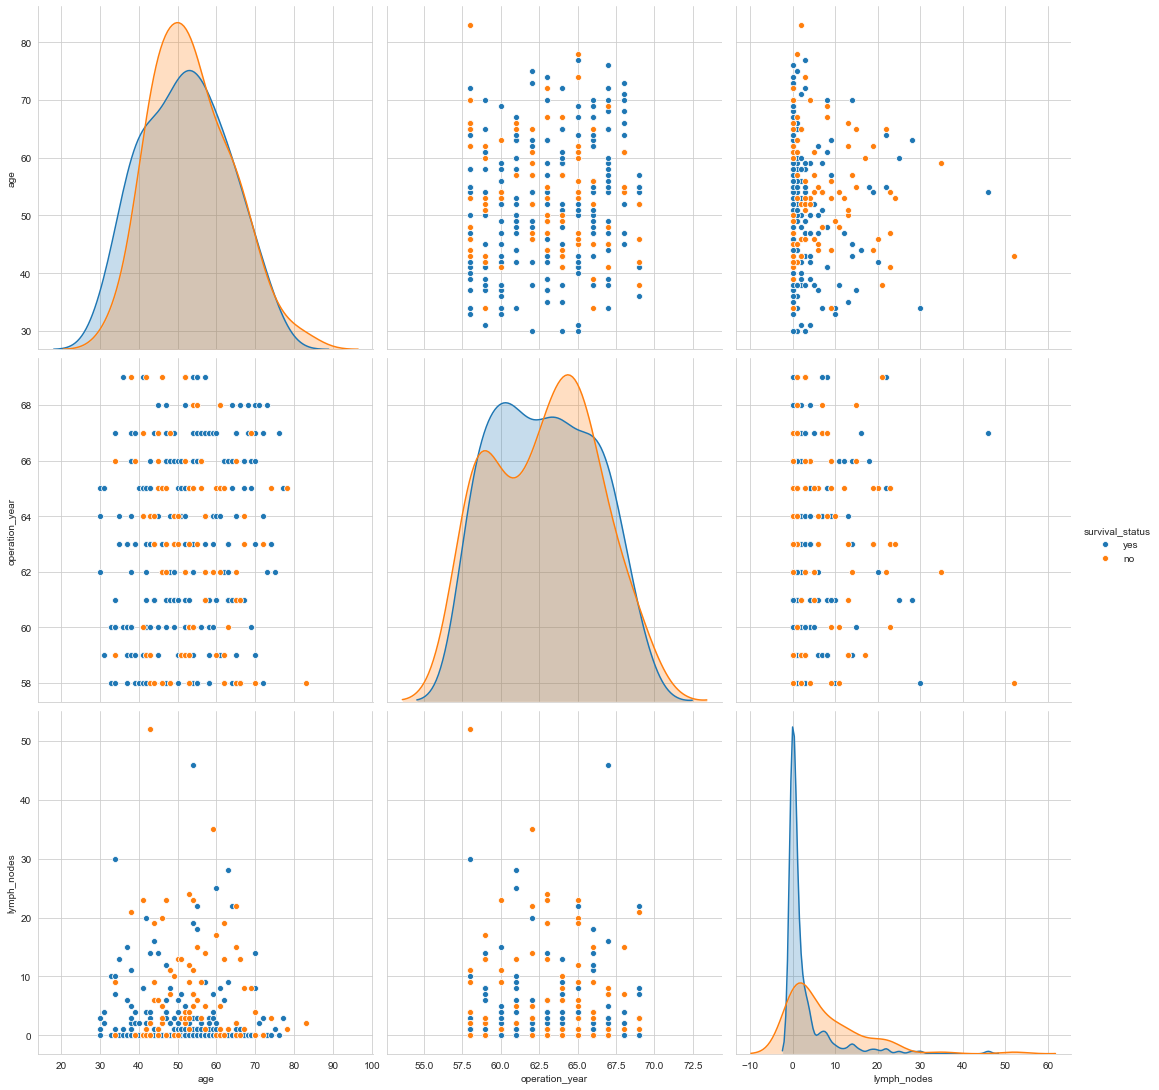

In [13]:
sns.set_style("whitegrid");
sns.pairplot(data,hue="survival_status",height=5);
plt.show()

### Observations:
* By the above pair plots we can conclude that there is slightly a better seperation of datapoints between lymph_nodes and operation_year.

# Histogram

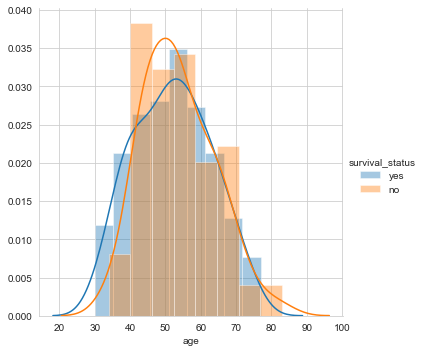

In [14]:
# histogram for age
sns.FacetGrid(data,hue="survival_status",height=5)    \
    .map(sns.distplot,"age")    \
    .add_legend();
plt.show();

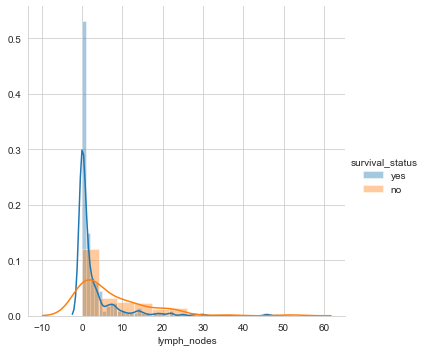

In [15]:
# histogram for lymph_nodes
sns.FacetGrid(data,hue="survival_status",height=5)    \
    .map(sns.distplot,"lymph_nodes")    \
    .add_legend();
plt.show();

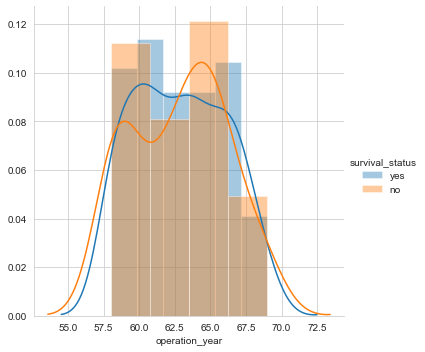

In [16]:
# histogram for operation_year
sns.FacetGrid(data,hue="survival_status",height=5)    \
    .map(sns.distplot,"operation_year")    \
    .add_legend();
plt.show();

### Observation:
* The number of lymph nodes is highly dense between 0-6 (roughly).

# Plotting PDFs and CDFs

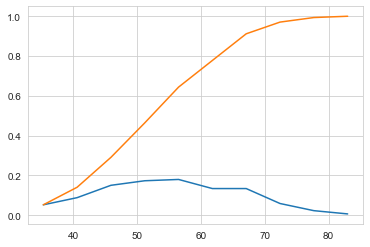

In [17]:
# plotting the PDF and CDF for age

cnt,bin_edges=np.histogram(data['age'],bins=10,density=True)

# calculating pdf
pdf=cnt/sum(cnt)
#print(pdf)
#print(bin_edges)

# compute CDF
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

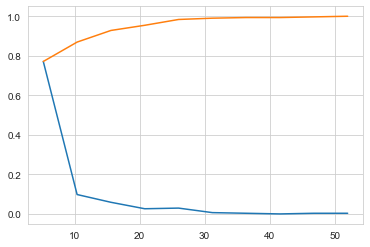

In [18]:
# plotting the PDF and CDF for lymph_nodes

cnt,bin_edges=np.histogram(data['lymph_nodes'],bins=10,density=True)

# calculating pdf
pdf=cnt/sum(cnt)
#print(pdf)
#print(bin_edges)

# compute CDF
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

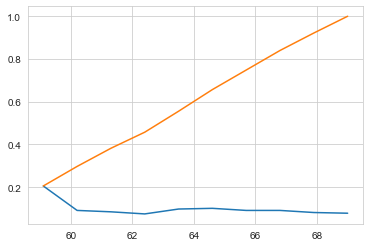

In [19]:
# plotting the PDF and CDF for operation_year

cnt,bin_edges=np.histogram(data['operation_year'],bins=10,density=True)

# calculating pdf
pdf=cnt/sum(cnt)
#print(pdf)
#print(bin_edges)

# compute CDF
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

### Observation:
* Almost 80% of the patients have less than or almost 6 lymph nodes

# Box Plots:

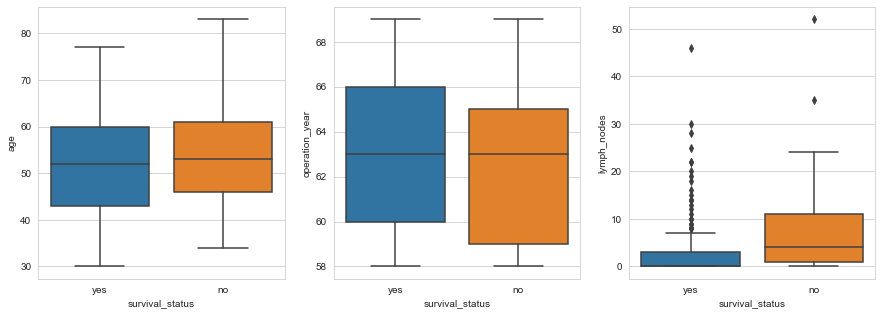

In [20]:
# making the 3 subplots in a plot
fig, axes = plt.subplots(1,3,figsize=(15,5))

# iterating through all the features of the data
for idx, feature in enumerate(list(data.columns)[:-1]):
    sns.boxplot(x='survival_status',y=feature,data=data,ax=axes[idx])
plt.show() 

# Violin Plots

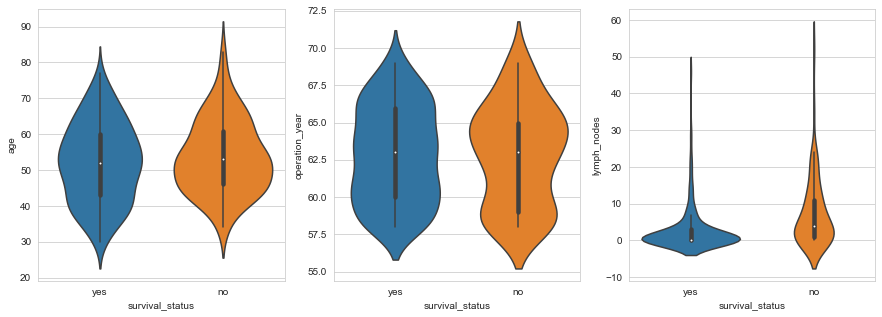

In [21]:
# making the 3 subplots in a plot
fig,axes=plt.subplots(1,3,figsize=(15,5))

# iterating through all the features of the data
for idx,feature in enumerate(list(data.columns)[:-1]):
    sns.violinplot( x='survival_status', y=feature, data=data,ax=axes[idx])
plt.show()

### Observations:
* The patients treated after the year 1996 (rough estimate) has the higher chance of survival.
* The pateints treated before the year 1956 (rought estimate) has slightly lower chance of survival.